# Finding the edges with Canny


## Edges
In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.
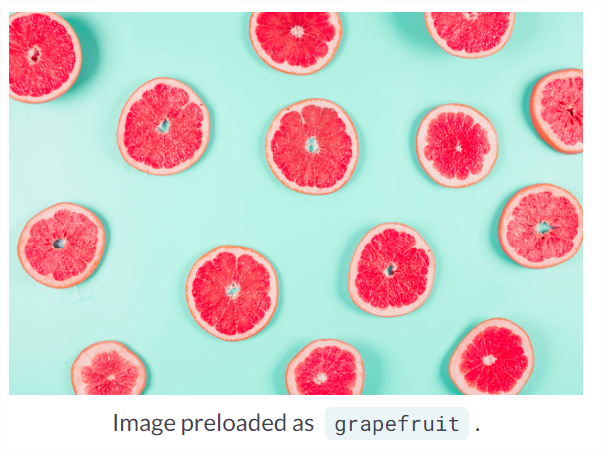
Grapefruits
Image preloaded as grapefruit.
The color module has already been preloaded for you.

### init

In [1]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(grapefruit, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'grapefruit[417_626_3].csv': 'https://file.io/KYCqT9'}}
"""
prefixToc = '1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
grapefruit = getImage(prefix+'grapefruit[417_626_3].csv')



Using TensorFlow backend.


Téléchargements à lancer

{numpy.ndarray: {"grapefruit[417_626_3].csv": "https://file.io/KYCqT9"}}

{'numpy.ndarray': {'grapefruit[417_626_3].csv': 'https://file.io/KYCqT9'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 2700k    0 2700k    0     0   778k      0 --:--:--  0:00:03 --:--:--  778k
100 4588k    0 4588k    0     0  1113k      0 --:--:--  0:00:04 --:--:-- 1113k


In [2]:
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()

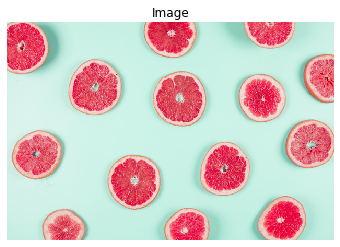

In [4]:
show_image(grapefruit)
from skimage import color

### code

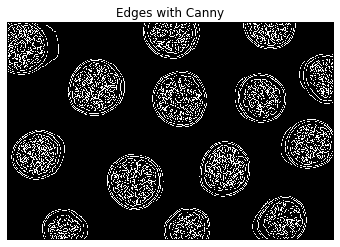

In [5]:
# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

## Less edgy
Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

In this exercise, you'll experiment with sigma values of the canny() function.

Grapefruits
Image preloaded as grapefruit.
The show_image has already been preloaded.

### code

In [9]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

In [10]:
# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

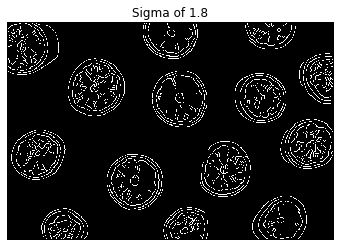

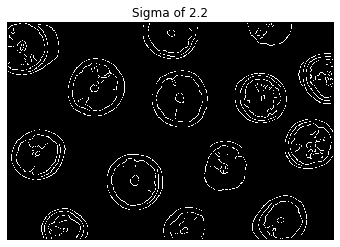

In [12]:
# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

# Right around the corner


## Perspective
In this exercise, you will detect the corners of a building using the Harris corner detector.
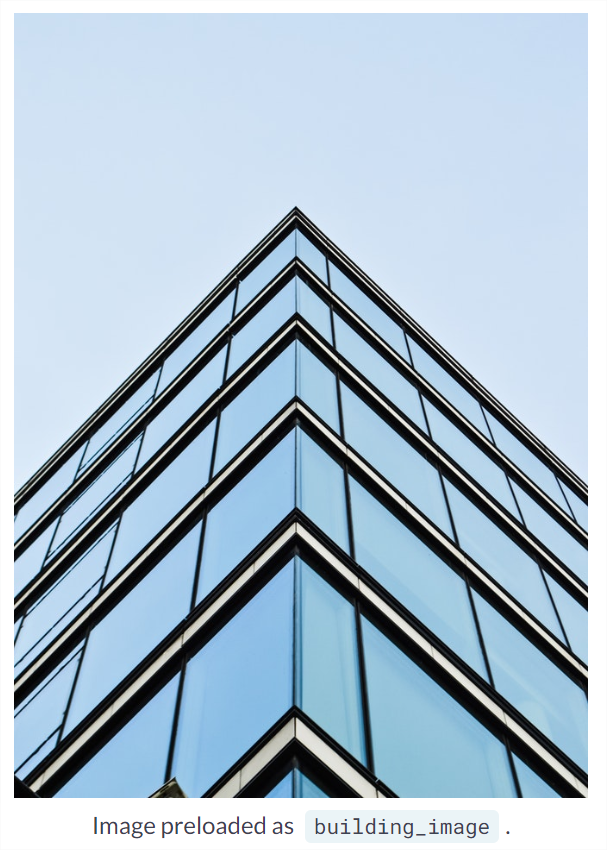
Building from a bottom perspective
Image preloaded as building_image.
The functions show_image() and show_image_with_corners() have already been preloaded for you. As well as the color module for converting images to grayscale.

### init

Téléchargements à lancer

{numpy.ndarray: {"building_image[910_666_3].csv": "https://file.io/YfS72W"}}

{'numpy.ndarray': {'building_image[910_666_3].csv': 'https://file.io/YfS72W'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
100 3253k    0 3253k    0     0   636k      0 --:--:--  0:00:05 --:--:--  664k
100 6448k    0 6448k    0     0  1055k      0 --:--:--  0:00:06 --:--:-- 1365k
100 9298k    0 9298k    0 

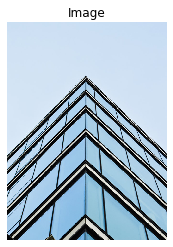

In [13]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(building_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'building_image[910_666_3].csv': 'https://file.io/YfS72W'}}
"""
prefixToc = '2.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
building_image = getImage(prefix+'building_image[910_666_3].csv')
show_image(building_image)


In [15]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()


### code

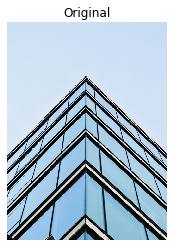

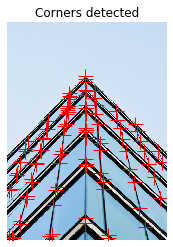

In [16]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

## Less corners
In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the min_distance attribute parameter of the corner_peaks() function.

Building from a bottom perspective
Image preloaded as building_image.
The functions show_image(), show_image_with_corners() and required packages have already been preloaded for you. As well as all the previous code for finding the corners. The Harris measure response image obtained with corner_harris() is preloaded as measure_image.

### code

In [17]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance setted to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

With a min_distance setted to 2, we detect a total 98 corners in the image.


In [18]:
# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, 40)
print("With a min_distance setted to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

With a min_distance setted to 40, we detect a total 36 corners in the image.


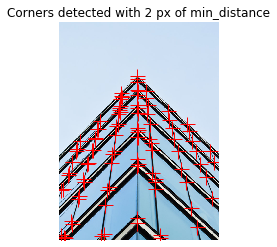

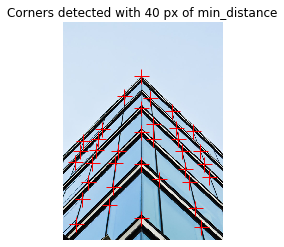

In [19]:
# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

# Face detection


## Is someone there?
In this exercise, you will check whether or not there is a person present in an image taken at night.
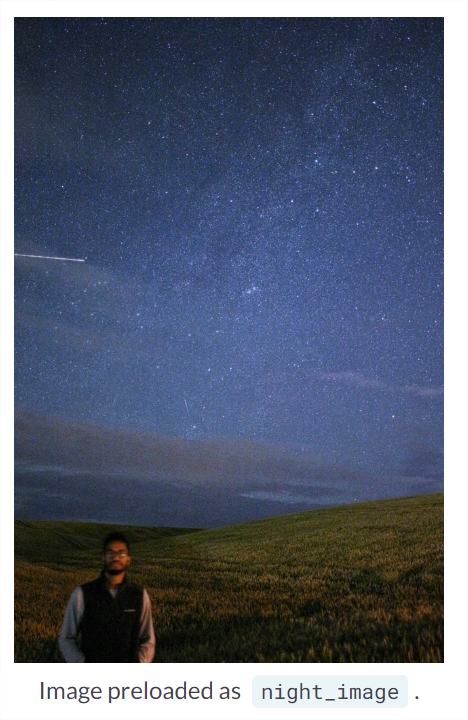
LAndscape of starry night with a young man in the left bottom corner
Image preloaded as night_image.
The Cascade of classifiers class from feature module has been already imported. The same is true for the show_detected_face() function, that is used to display the face marked in the image and crop so it can be shown separately.

### init

Téléchargements à lancer

{numpy.ndarray: {"night_image[951_634_3].csv": "https://file.io/NKl7dk"}}

{'numpy.ndarray': {'night_image[951_634_3].csv': 'https://file.io/NKl7dk'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100  133k    0  133k    0     0  35232      0 --:--:--  0:00:03 --:--:-- 35232
100 1966k    0 1966k    0     0   403k      0 --:--:--  0:00:04 --:--:--  403k
100 3616k    0 3616k    0     0   615k      0 --:--:--  0:00:05 --:--:--  796k
100 5326k    0 5326k    0     0   773k      0 --:--:--  0:00:06 --:--:-- 1173k
100 6916k    0 6916k    0     0 

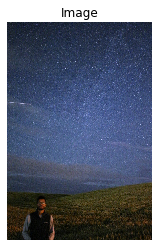

In [20]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(night_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'night_image[951_634_3].csv': 'https://file.io/NKl7dk'}}
"""
prefixToc = '3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
night_image = getImage(prefix+'night_image[951_634_3].csv')
show_image(night_image)


In [21]:
# Import the classifier class
from skimage.feature import Cascade
from skimage import data

In [26]:
from matplotlib import patches
def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()


### code

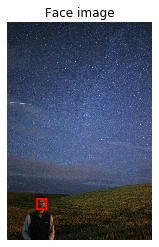

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


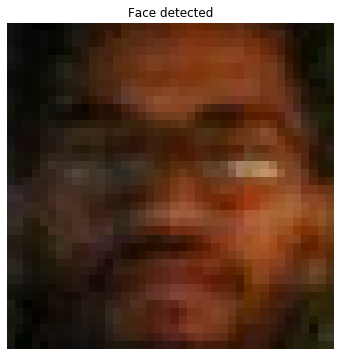

In [27]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

## Multiple faces
In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!
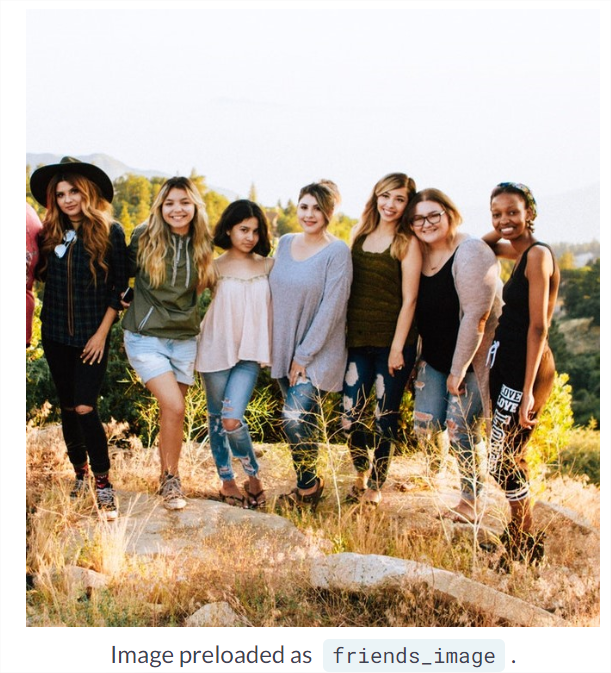
A group of 7 friends
Image preloaded as friends_image.
The Cascade of classifiers class from feature module has already been imported, as well as the show_detected_face() function which is used to display the face marked in the image and crop it so it can be shown separately.

### init

Téléchargements à lancer

{numpy.ndarray: {"friends_image[717_667_3].csv": "https://file.io/DcYjJp"}}

{'numpy.ndarray': {'friends_image[717_667_3].csv': 'https://file.io/DcYjJp'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100 2835k    0 2835k    0     0   633k      0 --:--:--  0:00:04 --:--:--  633k
100 7170k    0 7170k    0     0  1292k      0 --:--:--  0:00:05 --:--:-- 1705k
100 8406k    0 8406k    0     0  1444k      0 --:--:--  0:00:05 --:--:-- 2417k


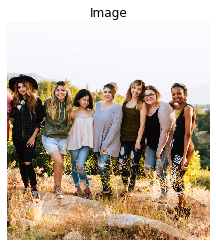

In [28]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(friends_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'friends_image[717_667_3].csv': 'https://file.io/DcYjJp'}}
"""
prefixToc = '3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
friends_image = getImage(prefix+'friends_image[717_667_3].csv')
show_image(friends_image)


### code

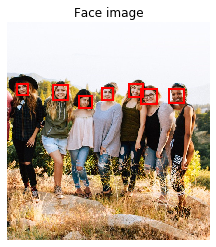

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


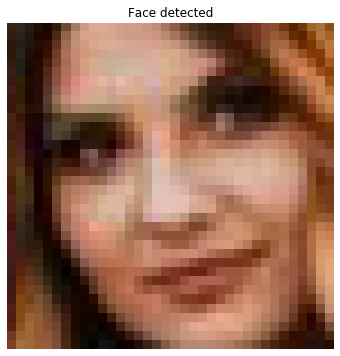

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


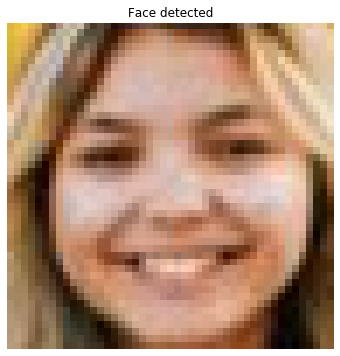

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


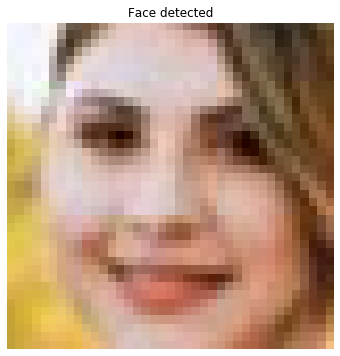

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


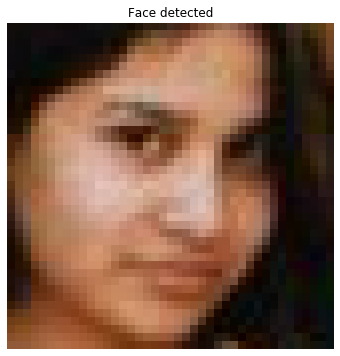

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


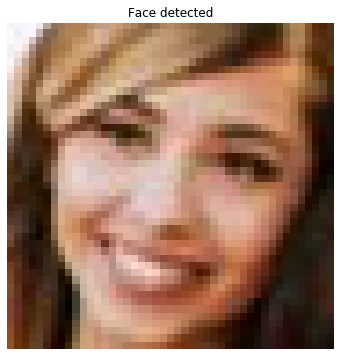

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


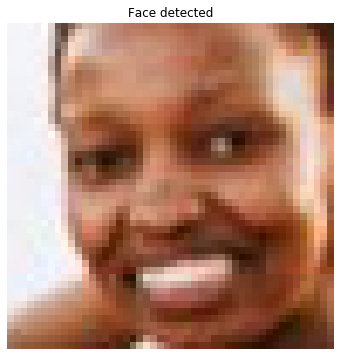

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


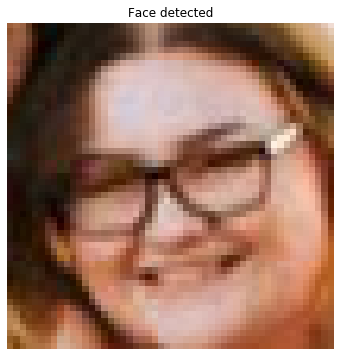

In [29]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

## Segmentation and face detection
Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

Using the slic() function for segmentation, pre-process the image before passing it to the face detector.
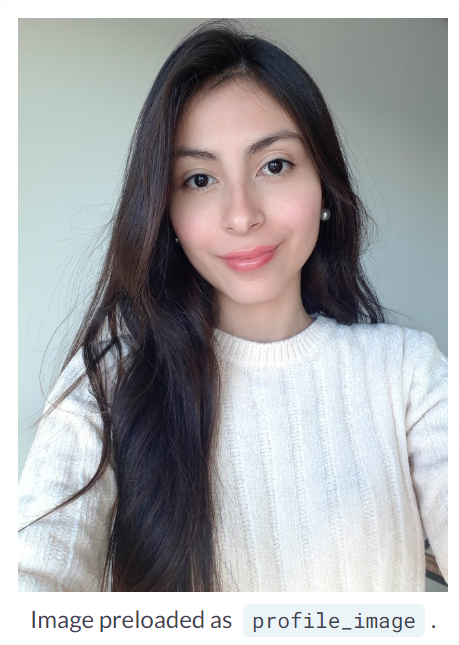
Young woman selfie
Image preloaded as profile_image.
The Cascade class, the slic() function from segmentation module, and the show_detected_face() function for visualization have already been imported. The detector is already initialized and ready to use as detector.

### init

Téléchargements à lancer

{numpy.ndarray: {"profile_image[882_662_3].csv": "https://file.io/ixxLU3"}}

{'numpy.ndarray': {'profile_image[882_662_3].csv': 'https://file.io/ixxLU3'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100 2256k    0 2256k    0     0   473k      0 --:--:--  0:00:04 --:--:--  473k
100 4131k    0 4131k    0     0   718k      0 --:--:--  0:00:05 --:--:--  936k
100 6336k    0 6336k    0     0   938k      0 --:--:--  0:00:06 --:--:-- 1436k
100 7776k    0 7776k    0   

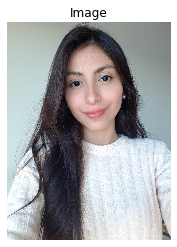

In [30]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(profile_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'profile_image[882_662_3].csv': 'https://file.io/ixxLU3'}}
"""
prefixToc = '3.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
profile_image = getImage(prefix+'profile_image[882_662_3].csv')
show_image(profile_image)


In [32]:
from skimage.segmentation import slic
from skimage.color import label2rgb


### code

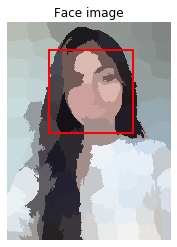

{'r': 110, 'c': 169, 'width': 340, 'height': 340}


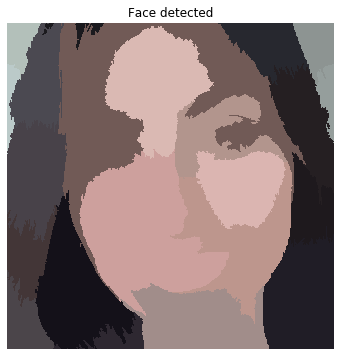

In [33]:
# Obtain the segmentation with default 100 regions
segments = slic(profile_image, n_segments=100)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

# Real-world applications


## Privacy protection
Let's look at a real-world application of what you have learned in the course.

In this exercise, you will detect faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically.
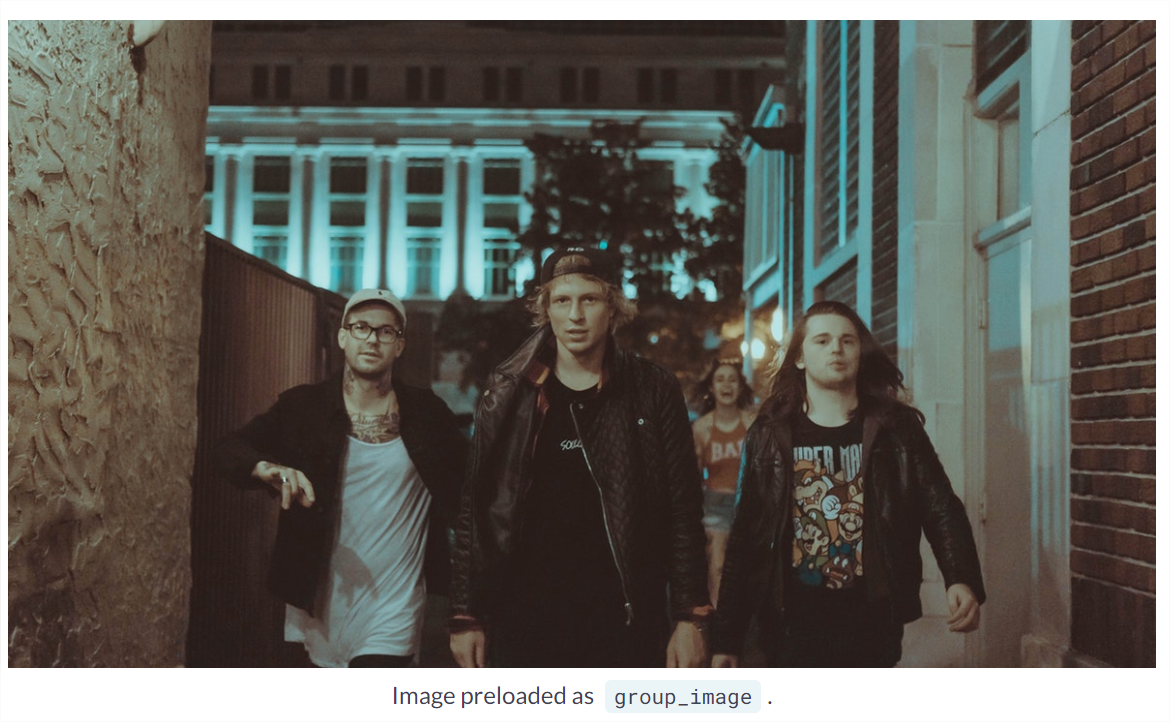
Group band walking
Image preloaded as group_image.
You can use the gaussian filter for the blurriness.

The face detector is ready to use as detector and all packages needed have been imported.

### init

Téléchargements déjà effectués - SKIP


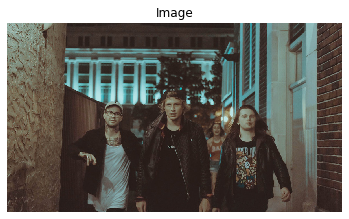

In [35]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(group_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'group_image[669_1187_3].csv': 'https://file.io/B7AN9R'}}
"""
prefixToc = '4.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
group_image = getImage(prefix+'group_image[669_1187_3].csv', dtype='float64')
show_image(group_image)


In [41]:
def getFaceRectangle(d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= group_image[ x:width, y:height]
    return face

# Import Gaussian filter 
from skimage.filters import gaussian

def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] =  gaussian_image
    return original


### code

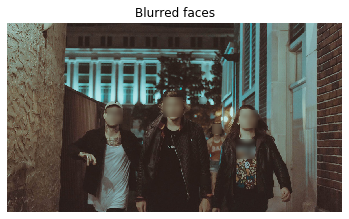

In [42]:
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10,10), max_size=(100, 100))
# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma = 8)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face) 
show_image(resulting_image, "Blurred faces")

## Help Sally restore her graduation photo
You are going to combine all the knowledge you acquired throughout the course to complete a final challenge: reconstructing a very damaged photo.

Help Sally restore her favorite portrait which was damaged by noise, distortion, and missing information due to a breach in her laptop.
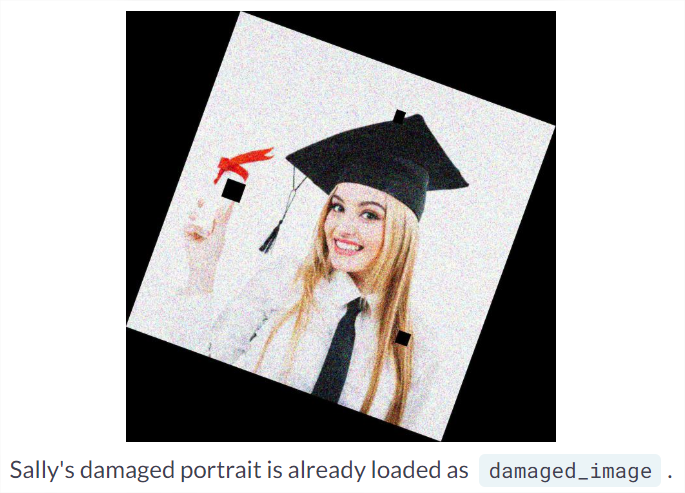
Sally damaged picture
Sally's damaged portrait is already loaded as damaged_image.
You will be fixing the problems of this image by:

Rotating it to be uprightusing rotate()
Applying noise reduction with denoise_tv_chambolle()
Reconstructing the damaged parts with inpaint_biharmonic() from the inpaint module.
show_image() is already preloaded.

### init

Téléchargements déjà effectués - SKIP


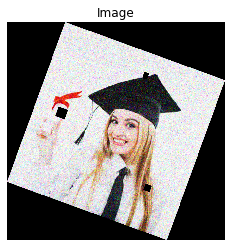

In [44]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(damaged_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'damaged_image[666_666_3].csv': 'https://file.io/015SCL'}}
"""
prefixToc = '4.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
damaged_image = getImage(prefix+'damaged_image[666_666_3].csv', dtype='float64')
show_image(damaged_image)


In [46]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution


### code

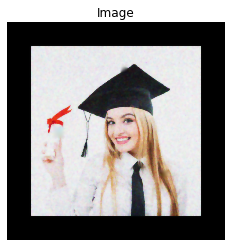

In [47]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(result)